In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
! pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [14]:
! kaggle datasets download -d sulianova/cardiovascular-disease-dataset

  0% 0.00/742k [00:00<?, ?B/s]
100% 742k/742k [00:00<00:00, 90.2MB/s]


In [15]:
!unzip /content/cardiovascular-disease-dataset.zip


Archive:  /content/cardiovascular-disease-dataset.zip
  inflating: cardio_train.csv        


In [16]:
data = pd.read_csv (r'/content/cardio_train.csv', delimiter=';', encoding = "ISO-8859-1")         # As vezes encoding = "utf-8"
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [17]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
data['bmi'] = (data['weight'] / (((data['height']/100)**2))).round(decimals=2)   # Body mass index
data['age_y'] = (data['age']/365).round(decimals=2)                               # Age in years

# Creating Flags for categories as 0-1

data['bmi_high'] = (data['bmi'] >= 30).astype(int)

In [19]:
del data['age']
del data['id']

In [20]:
data.head(10)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_y,bmi_high
0,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50.39,0
1,1,156,85.0,140,90,3,1,0,0,1,1,34.93,55.42,1
2,1,165,64.0,130,70,3,1,0,0,0,1,23.51,51.66,0
3,2,169,82.0,150,100,1,1,0,0,1,1,28.71,48.28,0
4,1,156,56.0,100,60,1,1,0,0,0,0,23.01,47.87,0
5,1,151,67.0,120,80,2,2,0,0,0,0,29.38,60.04,0
6,1,157,93.0,130,80,3,1,0,0,1,0,37.73,60.58,1
7,2,178,95.0,130,90,3,3,0,0,1,1,29.98,61.87,0
8,1,158,71.0,110,70,1,1,0,0,1,0,28.44,48.41,0
9,1,164,68.0,110,60,1,1,0,0,0,0,25.28,54.34,0


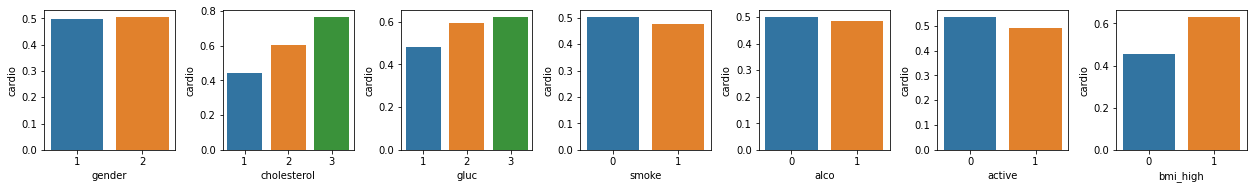

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

In [21]:
Columns = ('gender', 'cholesterol',	'gluc',	'smoke',	'alco',	'active',	'bmi_high')
fig=plt.figure(figsize=(20,20))
j = 1
for i in Columns :
  ax=fig.add_subplot(8,8,j)
  j = j + 1
  plt.figure(figsize=(2, 2))
  sns.barplot(x=i,y='cardio',data=data,ci=None,ax=ax)
  fig.tight_layout()  
plt.show()

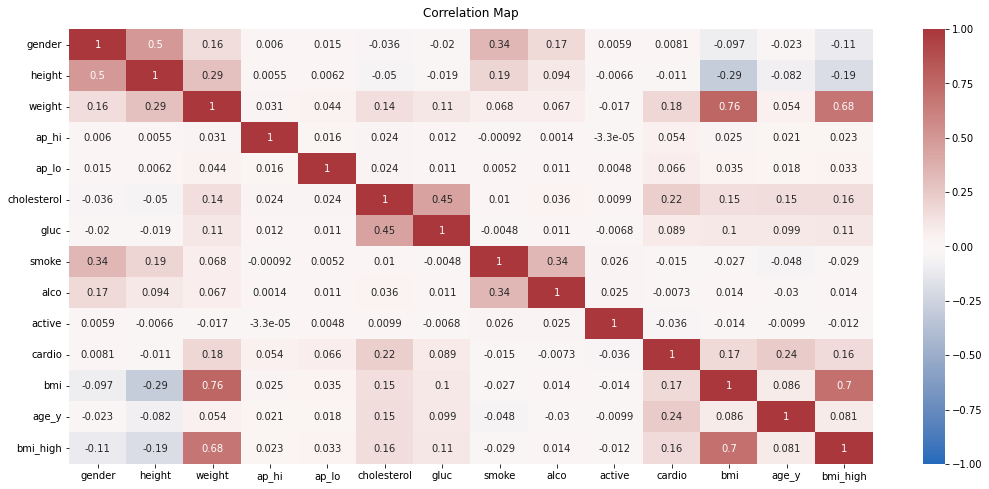

In [22]:
plt.figure(figsize=(18, 8))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag') # cmap='BrBG'
plt.title('Correlation Map', fontdict={'fontsize':12}, pad=12);

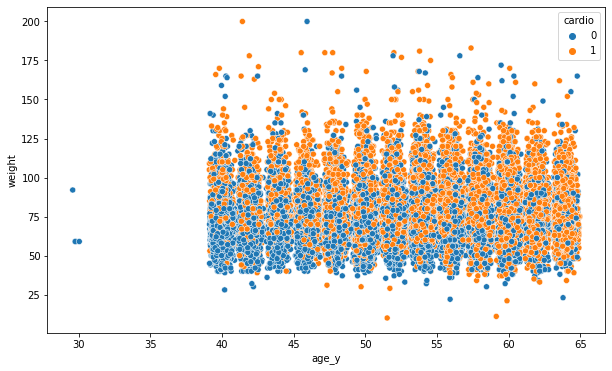

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_y', y='weight', data= data, hue='cardio')

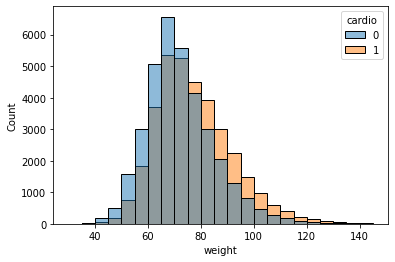

In [24]:
sns.histplot(data, x='weight', bins = range(30,150,5), hue='cardio')

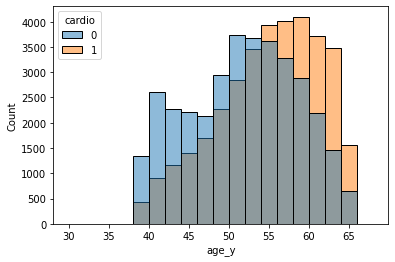

In [25]:
sns.histplot(data, x='age_y', bins = range(30,70,2), hue='cardio')

In [26]:
dataX = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12,13]]        # 

In [27]:
dataY = data.iloc[:,10]  

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(dataX, dataY,random_state=1, test_size=0.2)

In [29]:
X_train.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,age_y,bmi_high
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.00000,56000.000000,56000.000000,56000.000000,56000.000000
mean,1.350607,164.377411,74.269059,128.586571,96.592446,1.366786,1.225964,0.088643,0.05400,0.802982,27.575168,53.339259,0.265607
std,0.477164,8.212558,14.438785,146.476142,190.875418,0.679137,0.571761,0.284230,0.22602,0.397749,6.132967,6.765085,0.441660
min,1.000000,57.000000,11.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.00000,0.000000,3.470000,29.580000,0.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,23.880000,48.390000,0.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,26.400000,53.990000,0.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.00000,1.000000,30.292500,58.430000,1.000000
max,2.000000,207.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.00000,1.000000,298.670000,64.900000,1.000000


In [30]:
X_test.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,age_y,bmi_high
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,1.345429,164.286500,73.952216,129.740143,96.782286,1.367214,1.228429,0.086071,0.052857,0.806714,27.482054,53.339706,0.260786
std,0.475525,8.200284,14.220028,181.046019,178.544352,0.684712,0.574320,0.280480,0.223756,0.394889,5.921870,6.737720,0.439079
min,1.000000,55.000000,10.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.670000,39.130000,0.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,23.840000,48.407500,0.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,26.350000,53.960000,0.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.120000,58.420000,1.000000
max,2.000000,250.000000,181.000000,13010.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,267.770000,64.970000,1.000000


In [31]:
# type(Y_test)
Y_test

6670     1
49567    1
50796    1
22310    1
54037    1
        ..
35736    1
45283    0
1541     0
51612    0
28646    0
Name: cardio, Length: 14000, dtype: int64

In [34]:
training_accuracy = []
testing_accuracy = []
Layer1 = range(10,90,20)
Layer2 = range(10,90,20)
LayersComb = len(Layer1)*len(Layer2)
Step=0
score=0

for i in Layer1 :
  for j in Layer2 :
    mlp = MLPRegressor(hidden_layer_sizes=(i,j),activation="logistic" ,random_state=1, max_iter=2000).fit(X_train, Y_train)
    Y_pred_train = mlp.predict(X_train).round()
    training_accuracy.append(accuracy_score(Y_train, Y_pred_train))
    Y_pred_test = mlp.predict(X_test).round()
    acc_score = accuracy_score(Y_test,Y_pred_test)
    testing_accuracy.append(acc_score)
    Step = Step + 1
    if score < acc_score:
        score = acc_score
        best_Layer1 = i
        best_Layer2 = j
        best_Step = Step
    
    print('Step ', Step, ' of ', LayersComb, ' Layer1: ', i, ' Layer2: ', j)    
    print('Best Accuracy Score', score.round(4), ' Best Layer1: ', best_Layer1, ' Best Layer2: ', best_Layer2, ' do Step:', best_Step)


Step  1  of  16  Layer1:  10  Layer2:  10
Best Accuracy Score 0.7277  Best Layer1:  10  Best Layer2:  10  do Step: 1
Step  2  of  16  Layer1:  10  Layer2:  30
Best Accuracy Score 0.7291  Best Layer1:  10  Best Layer2:  30  do Step: 2
Step  3  of  16  Layer1:  10  Layer2:  50
Best Accuracy Score 0.7297  Best Layer1:  10  Best Layer2:  50  do Step: 3
Step  4  of  16  Layer1:  10  Layer2:  70
Best Accuracy Score 0.7299  Best Layer1:  10  Best Layer2:  70  do Step: 4
Step  5  of  16  Layer1:  30  Layer2:  10
Best Accuracy Score 0.7311  Best Layer1:  30  Best Layer2:  10  do Step: 5
Step  6  of  16  Layer1:  30  Layer2:  30
Best Accuracy Score 0.7311  Best Layer1:  30  Best Layer2:  10  do Step: 5
Step  7  of  16  Layer1:  30  Layer2:  50
Best Accuracy Score 0.7314  Best Layer1:  30  Best Layer2:  50  do Step: 7
Step  8  of  16  Layer1:  30  Layer2:  70
Best Accuracy Score 0.7314  Best Layer1:  30  Best Layer2:  50  do Step: 7
Step  9  of  16  Layer1:  50  Layer2:  10
Best Accuracy Score 0.

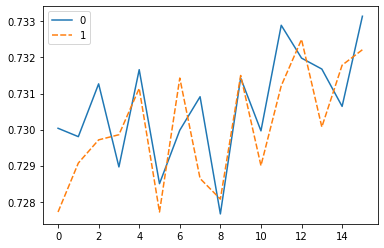

In [35]:
sns.lineplot(data=[training_accuracy,testing_accuracy])

In [36]:
mlp_selected = MLPRegressor(hidden_layer_sizes=(70,70),activation="logistic" ,random_state=1, max_iter=2000)
mlp_selected.fit(X_test, Y_test)

MLPRegressor(activation='logistic', hidden_layer_sizes=(70, 70), max_iter=2000,
             random_state=1)

In [37]:
Y_pred_train = mlp_selected.predict(X_train).round()
training_accuracy.append(accuracy_score(Y_train, Y_pred_train))
Y_pred_test = mlp_selected.predict(X_test).round()
acc_score = accuracy_score(Y_test,Y_pred_test)
testing_accuracy.append(acc_score)                                                                                                                                                                                                                                                                                

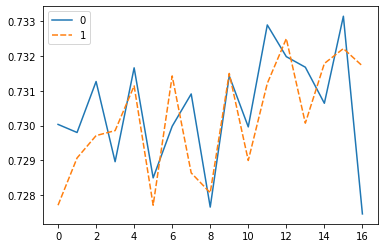

In [38]:
sns.lineplot(data=[training_accuracy,testing_accuracy])